### Importando as bibliotecas

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataframe do o arquivo .xlsx
df = pd.read_excel("STG_FNT_ITT.xlsx")

#pd.set_option('display.max_rows', None)

### Exibindo os primeiros valores

In [27]:
df

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
0,137,2427884087,2805,NMN,NMN,2019-12-19 13:43:41.914
1,183,12182674487,2635,NMN,NMN,2019-12-19 13:43:41.914
2,197,16167328168,1802,NMN,NMN,2019-12-19 13:43:41.914
3,267,279925978,2329,NMN,NMN,2019-12-19 13:43:41.914
4,322,20579036860,2397,NMN,NMN,2019-12-19 13:43:41.914
...,...,...,...,...,...,...
1003,87,11901046588,1972,NMN,NMN,2019-12-19 13:43:41.914
1004,105,17765603364,13056,NMN,NMN,2019-12-19 13:43:41.914
1005,118,17765603364,165138,NMN,NMN,2019-12-19 13:43:41.914
1006,124,17765603364,238697,NMN,NMN,2019-12-19 13:43:41.914


#### Calculando a amostra a ser analisada (total)

In [92]:
#id_qtd - IDs sempre serão diferentes de vazio
id_qtd = df.query('(ID_STG_FNT_ITT != "")')['ID_STG_FNT_ITT'].count()
id_qtd

1008

#### Valores únicos

In [105]:
# lista sem valores de cnpj repetidos
cnpjList = []
for c in range (len(df.NUM_CNPJ)):
    cnpj = str(df.NUM_CNPJ[c]) + str(df.NUM_CMP_CNPJ[c])
    cnpjList.append(cnpj)

# Eliminando os valores repetidos
cnpjList = list(dict.fromkeys(cnpjList))
len(cnpjList)

1008

#### Convertendo os campos da coluna NUM_CNPJ

In [106]:
# para o laço for
df.astype({'NUM_CNPJ': 'str'}).dtypes

ID_STG_FNT_ITT     int64
NUM_CNPJ          object
NUM_CMP_CNPJ       int64
NOM_COM           object
NOM_RAZ_SCL       object
DAT_INC_DBO       object
dtype: object

#### Listas para futuras consultas

In [107]:
# validação
cnpj_valido, cnpj_nao_valido = [], []

# misc.
cnpj_mais, cnpj_menos = [], []

### Validando os CNPJs com 14 dígitos

In [108]:
# válidos, inválidos, +14, -14
for c in range (len(cnpjList)):
    charCNPJ = len(cnpjList[c])
    
    if charCNPJ == 14: cnpj_valido.append(charCNPJ)
    else: cnpj_nao_valido.append(charCNPJ)
        
    if charCNPJ > 14: cnpj_mais.append(charCNPJ)
    if charCNPJ < 14: cnpj_menos.append(charCNPJ)

#### Exatamente 14 caracteres

In [109]:
len(cnpj_valido)

442

#### Inválidos  (+14, - 14)

In [110]:
len(cnpj_nao_valido)

566

#### Mais de 14 caracteres

In [111]:
len(cnpj_mais)

357

#### Menos de 14 Caracteres

In [112]:
len(cnpj_menos)

209

### Cálculos para os gráficos

#### Calculando as quantidades / porcentagens (válidos e não válidos)

In [113]:
#CNPJs válidos
op_vld = len(cnpj_valido)
vld = (op_vld*100) / id_qtd

#CNPJs não válidos
op_nvld = len(cnpj_nao_valido)
nvld = (op_nvld*100) / id_qtd

#### Calculando as quantidades / porcentagens (Caracteres)

In [114]:
# +14 Char
op_mais14 = len(cnpj_mais)
mais_14_char = (op_mais14*100) / id_qtd

# -14 Char
op_menos14 = len(cnpj_menos)
menos_14_char = (op_menos14*100) / id_qtd

### Gráfico 01 - CNPJ válido (14 caracteres) 

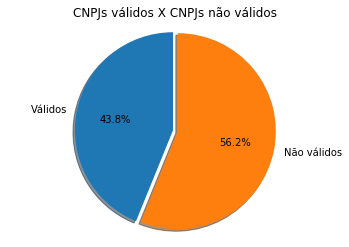

In [115]:
labels = 'Válidos', 'Não válidos'
sizes = [vld, nvld]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.set_title('CNPJs válidos X CNPJs não válidos')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Gráfico 02 - Qualidade geral

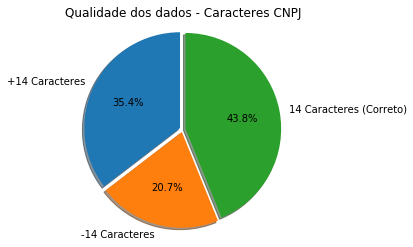

In [123]:
labels = '+14 Caracteres', '-14 Caracteres', '14 Caracteres (Correto)'
sizes = [mais_14_char, menos_14_char, vld]
explode = (0.03, 0.03, 0.03)

fig1, ax1 = plt.subplots()
ax1.set_title('Qualidade dos dados - Caracteres CNPJ')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()